## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** es un algoritmo de densidad, muy popular debido a su efectividad para tareas como identificación de clase en un contexto espacial.

Los algoritmos basados en densidad encuentran regiones de alta densidad que separan los datos y crean clusters asimétricos. Puede encontrar clusters de formar arbitrarias sin verse afectado por el ruido.

La idea detrás del **DBSCAN** es que si un punto en particular pertenece a un grupo, debería estar cerca de muchos otros puntos en ese grupo.


- **DBSCAN** puede encontrar clusters de formas arbitrarias. Incluso puede encontrar un cluster completamente rodeado por un grupo diferente. 

- **DBSCAN** tiene una noción de ruido y es robusto para outliers, aunque depende del dataset.

- **DBSCAN** es muy práctico para muchos problemas porque no requiere de especificar el número de clústeres en **`K-Means`**.



- Por ser un algoritmo de clustering **DBSCAN** no cuenta con un **`built-in method`** para **"predecir"** o **"clasificar"** nuevas instancias, si quisiéramos hacer esto, deberíamos entrenar un modelo de clasificación utilizando como columna objetivo la creada por **DBSCAN**.

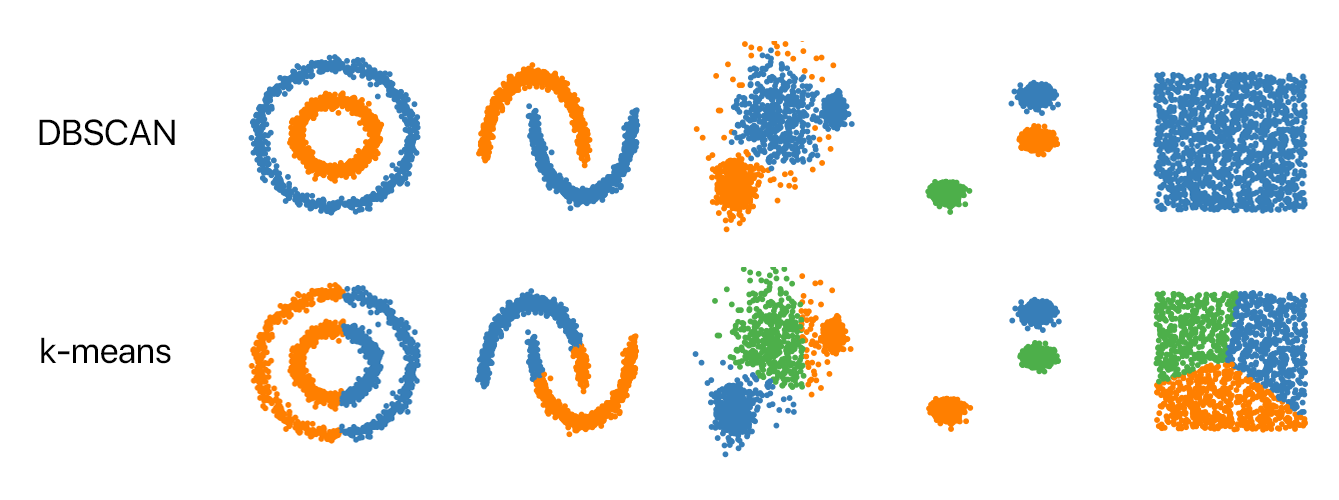

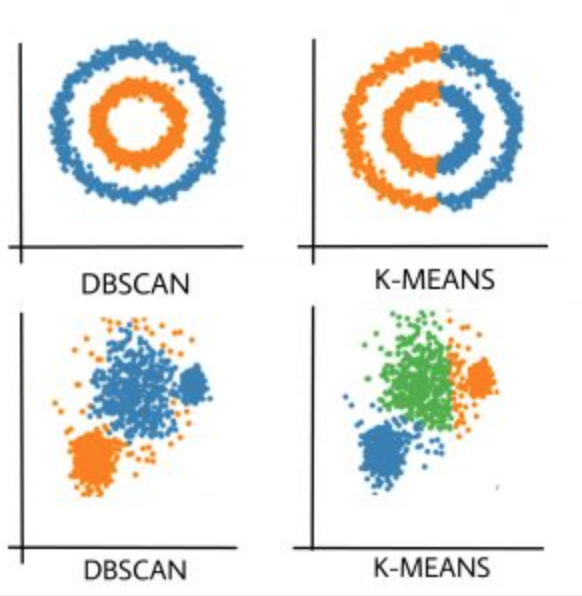

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html_

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

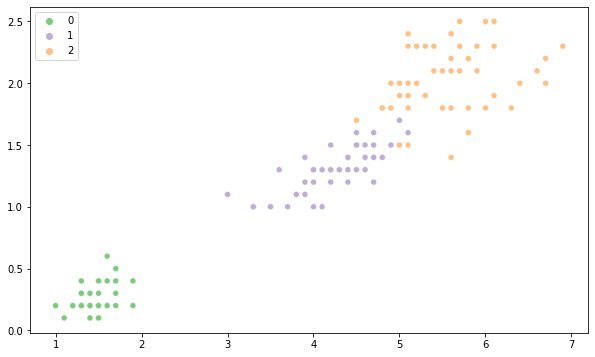

In [3]:
plt.figure(figsize = (10, 6))

# Datos Originales
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = y, palette = "Accent")
plt.show()

In [5]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

### Clustering

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN()
dbscan.fit(X)

DBSCAN()

### Etiquetas

In [8]:
# .labels_ nos retorna la "prediccion" del modelo de clustering
# El número de valores únicos está definido por n_clusters
# DBSCAN puede etiquetar outliers en caso de que los puntos esten muy alejados de la nube de puntos

dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
Counter(dbscan.labels_)

Counter({0: 150})

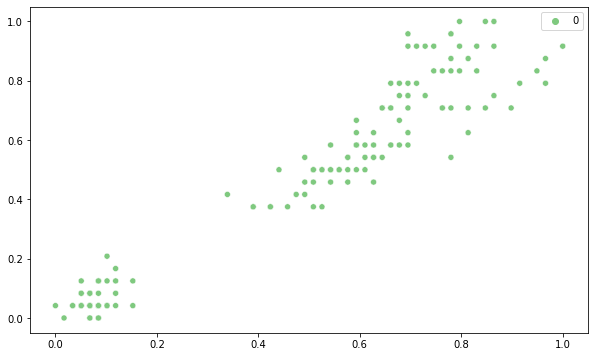

In [10]:
plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = dbscan.labels_, palette = "Accent")
plt.show()


# DBSCAN clasificó todos los elementos en el mismo grupo
# Esto es por el parámetro de "eps" que tiene un valor "muy alto".

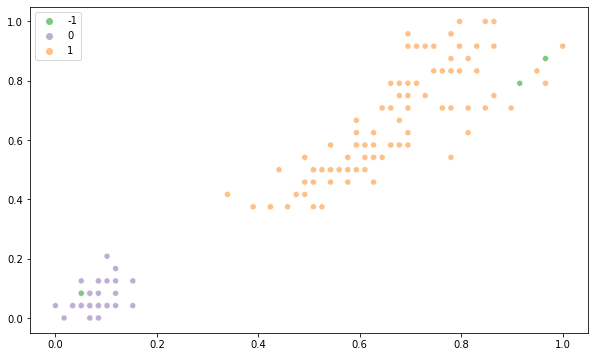

In [11]:
# DBSCAN con eps = 0.2

dbscan = DBSCAN(eps = 0.2)
dbscan.fit(X)

plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = dbscan.labels_, palette = "Accent")
plt.show()

# Ahora los clasifico en 2 nubes de puntos y además clasificó algunos puntos como outliers

In [12]:
Counter(dbscan.labels_)

Counter({0: 49, -1: 3, 1: 98})

### Parámetros del Modelo (Tuning)

#### Parametros de DBSCAN()

- **`eps`**: float, **default** = 0.5
    - La distancia máxima entre dos muestras para que una se considere en la vecindad de la otra.
    - Este es el parámetro más importante para crear adecuadamente los clusters, depende del conjunto de datos y la función de distancia.
___

- **`min_samples`**: int, **default** = 5
    - El número de elementos (o instancias) en una vecindad para que un punto se considere un punto central. Esto incluye el punto en sí.
    - Por lo general, es común ver que este número es **`2*n_atributos`**.    
___

- **`metric`**: str, **default** = "euclidean"
    - La métrica que se usará al calcular la distancia entre instancias en una matriz de características.
    - "cityblock", "cosine", "euclidean", "l1", "l2", "manhattan".
___

- **`algorithm`**: {"auto", "ball_tree", "kd_tree", "brute"}, **default** = "auto"
    - El algoritmo que usará **`NearestNeighbors`** para calcular distancias puntuales y encontrar vecinos más cercanos.
    - "auto" intentará decidir el algoritmo más apropiado en función de los valores de **`X`**.
___

- **`leaf_size`**: int, **`default`** = 30
    - Tamaño de hoja para **`BallTree`** o **`cKDTree`**.
    - Esto puede afectar la velocidad de construcción, así como la memoria requerida para almacenar el árbol.
    - El valor óptimo depende de la naturaleza del problema.

### Elbow method para DBSCAN


El valor para **`eps`** se puede elegir usando un gráfico de **`k-distance`**, trazando la distancia con **`k = min_samples - 1`** vecinos más cercano. Los "mejores" valores de **`eps`** son donde esta gráfica muestra un "codo".

- Si **`eps`** se elige demasiado pequeño, una gran parte de los datos no se agruparán.
- Mientras que para un valor demasiado alto de **`eps`**, los grupos se fusionarán y la mayoría de los objetos estarán en el mismo grupo.

En general, son preferibles los valores pequeños de **`eps`** y, como regla general, solo una pequeña fracción de puntos debe estar dentro de esta distancia entre sí.

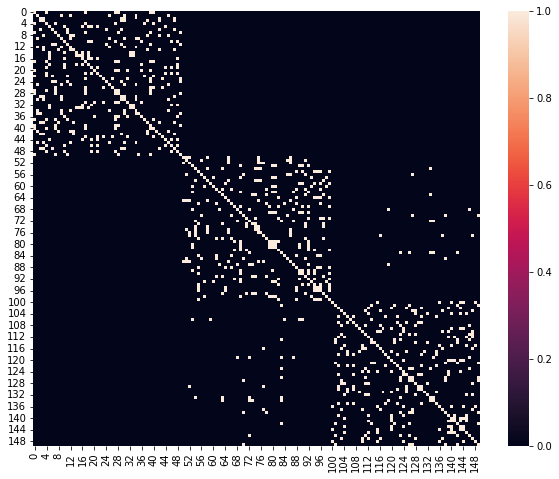

In [16]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2*X.shape[1] - 1)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Plot
plt.figure(figsize = (10, 8))

# Grafico de distancias con k-vecinos más cercanos
sns.heatmap(neigh.kneighbors_graph(X).toarray())

plt.show()

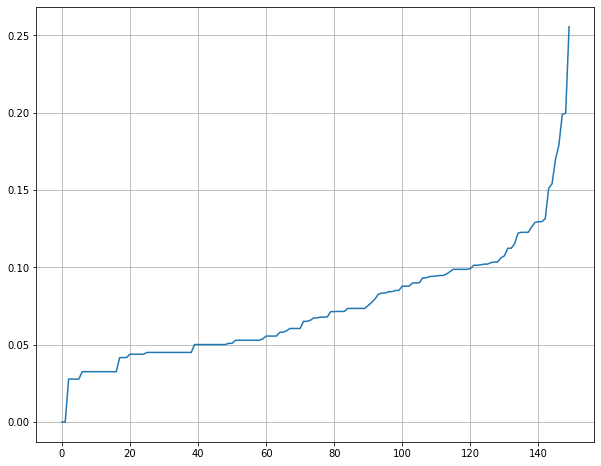

In [17]:
# Plot para encontrar el valor de eps más "optimo"

plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.grid()
plt.show();

In [18]:
2*X.shape[1]

8

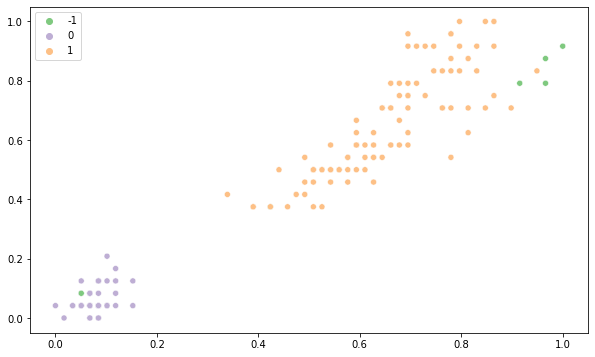

In [19]:
# DBSCAN con eps = 0.20, min_samples = 2*n_atributos

dbscan = DBSCAN(eps = 0.20, min_samples = 2*X.shape[1])
dbscan.fit(X)

plt.figure(figsize = (10, 6))

# Datos Originales filtrados por DBSCAN
sns.scatterplot(x = X[:, 2], y = X[:, 3], hue = dbscan.labels_, palette = "Accent")
plt.show()

# Ahora los clasifico en 2 nubes de puntos y además clasificó algunos puntos como outliers

In [20]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

silhouette scorre: 0.5235165165522614


### Comparación entre K-Means y DBSCAN

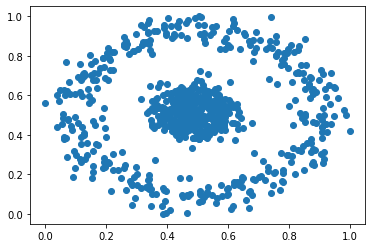

In [21]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 750, factor = 0.2, noise = 0.1, random_state = 42)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

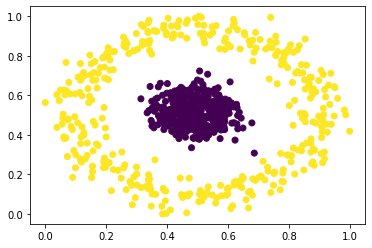

In [29]:
# Usando DBSCAN

dbscan = DBSCAN(eps = 0.1, min_samples = 10)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

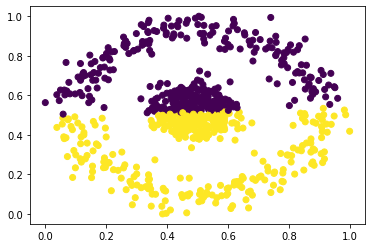

In [23]:
# Usando K-Means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_)
plt.show()

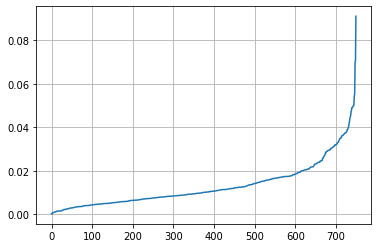

In [25]:
# Metodo del codo para DBSCAN

neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X)

distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.grid()
plt.show();

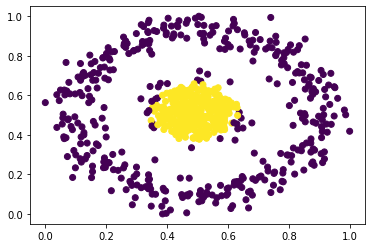

In [34]:
# Usando DBSCAN con eps = 0.03

dbscan = DBSCAN(eps = 0.03, min_samples = 10)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

In [35]:
Counter(dbscan.labels_)

Counter({0: 347, -1: 403})

In [36]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

silhouette scorre: 0.20347557053905915


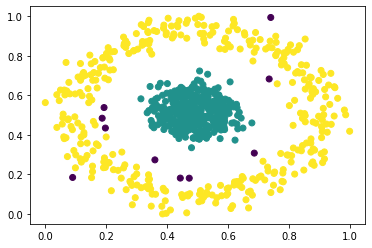

In [37]:
# Usando DBSCAN con eps = 0.07

dbscan = DBSCAN(eps = 0.07, min_samples = 10)
dbscan.fit(X)

plt.scatter(X[:, 0], X[:, 1], c = dbscan.labels_)
plt.show()

In [38]:
Counter(dbscan.labels_)

Counter({0: 375, 1: 365, -1: 10})

In [39]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

silhouette scorre: 0.2088205548145285


### Ejemplo: Market Segmentation

In [40]:
df = pd.read_csv("../Data/market_segmetation.csv")

df.drop("Id", axis = 1, inplace = True)

df.head(3)

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,40.900749,95.40,0.00,95.4,0.166667,0.083333,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.00,0.0,0.000000,0.000000,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,773.17,0.0,1.000000,0.000000,7500.0,622.066742,627.284787,12


In [41]:
df.drop_duplicates(inplace = True) 

df.shape

(8636, 10)

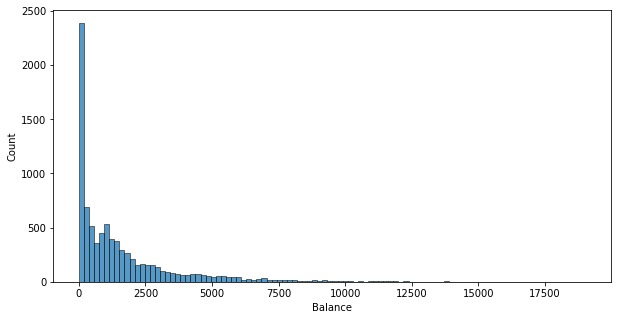

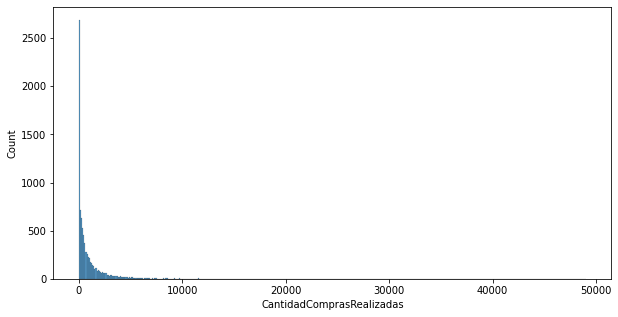

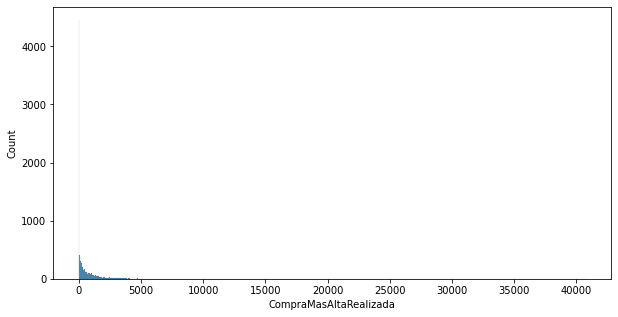

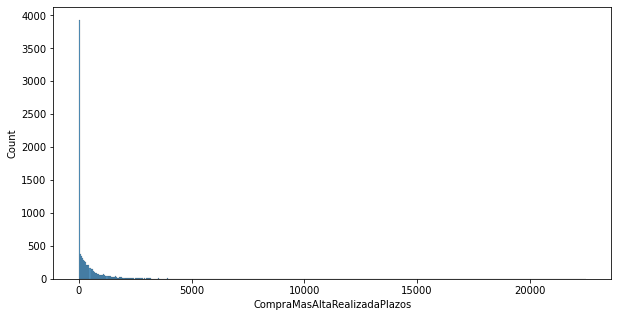

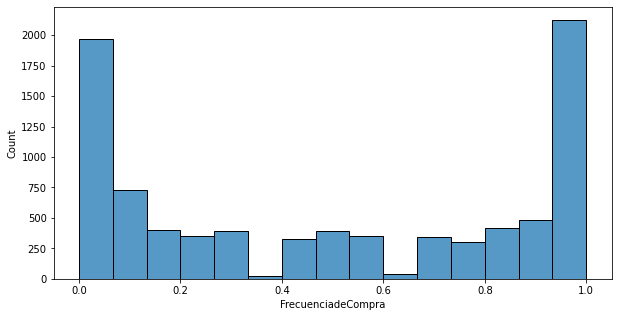

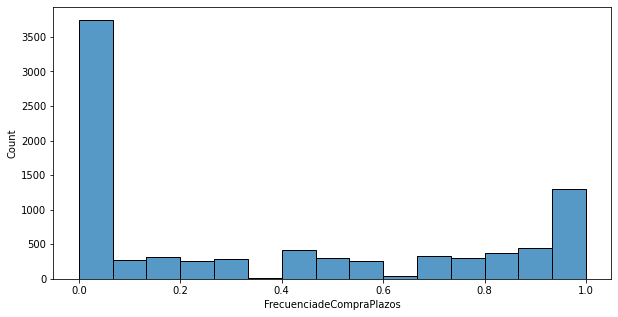

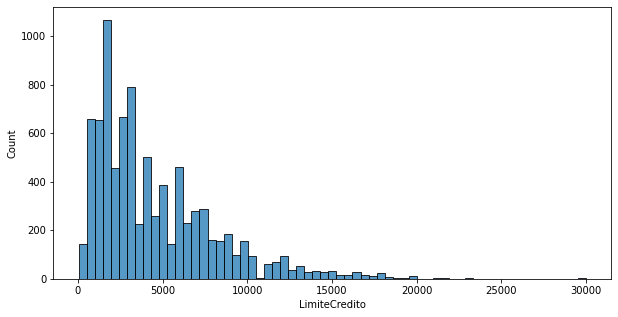

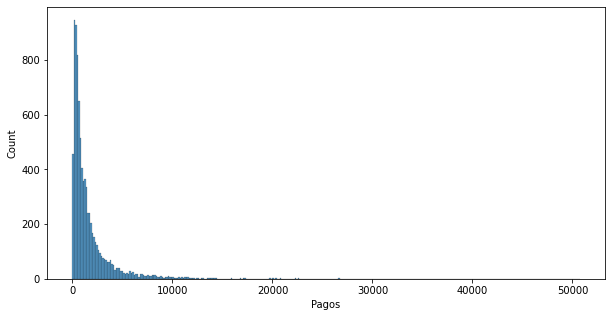

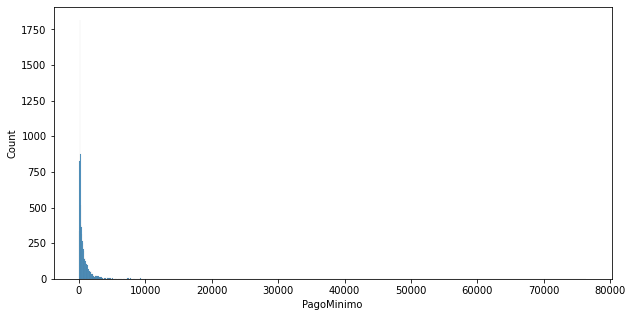

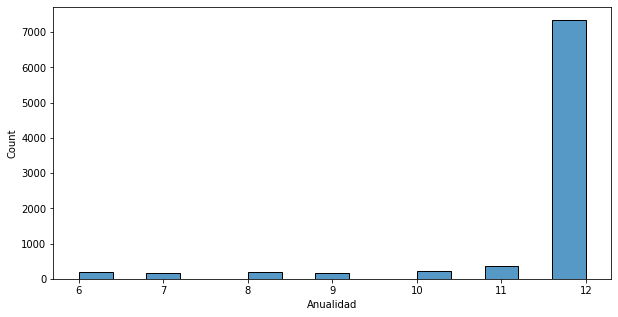

In [42]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(x = df[col])
    plt.show()

In [43]:
stast = df.describe()
stast

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,604.901438,420.843533,0.496000,0.368820,4522.091030,1784.478099,864.304943,11.534391
std,2095.571300,2167.107984,1684.307803,917.245182,0.401273,0.398093,3659.240379,2909.810090,2372.566350,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,6.000000
25%,148.095189,43.367500,0.000000,0.000000,0.083333,0.000000,1600.000000,418.559237,169.163545,12.000000
50%,916.855459,375.405000,44.995000,94.785000,0.500000,0.166667,3000.000000,896.675701,312.452292,12.000000
75%,2105.195853,1145.980000,599.100000,484.147500,0.916667,0.750000,6500.000000,1951.142090,825.496463,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,1.000000,1.000000,30000.000000,50721.483360,76406.207520,12.000000


In [44]:
(stast.loc['75%','Balance'] - stast.loc['25%','Balance'])*3

5871.301992000001

Vamos a establecer un límite de 3 veces el valor del percentil 75, de 

In [45]:
columns_to_filter = ['Balance', 
                     'CantidadComprasRealizadas' ,
                     'CompraMasAltaRealizada' ,
                     'CompraMasAltaRealizadaPlazos',
                     'LimiteCredito',
                     'Pagos',
                     'PagoMinimo'
                    ]
for col in columns_to_filter:
    
    df = df[df[col] <= (stast.loc['75%',col] - stast.loc['25%', col])*3]
    
# df = df[df["Balance"] < 6000]
# df = df[df["CantidadComprasRealizadas"] <= 3000]
# df = df[df["CompraMasAltaRealizada"] < 1500]
# df = df[df["CompraMasAltaRealizadaPlazos"] < 1500]
# df = df[df["LimiteCredito"] < 20000]
# df = df[df["Pagos"] < 8000]
# df = df[df["PagoMinimo"] < 3000]

df.drop("Anualidad", axis = 1, inplace = True)

df.shape

(6463, 9)

In [46]:
X = df.values

X.shape

(6463, 9)

### Procesamiento

In [47]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.00696989, 0.03040928, 0.        , ..., 0.05923345, 0.04392936,
        0.07093336],
       [0.54573185, 0.        , 0.        , ..., 0.47735192, 0.89337848,
        0.54529351],
       [0.42519783, 0.24645225, 0.43030627, ..., 0.51219512, 0.13543727,
        0.31897525],
       ...,
       [0.00398736, 0.04602831, 0.        , ..., 0.05923345, 0.01768502,
        0.0419014 ],
       [0.0022933 , 0.        , 0.        , ..., 0.02439024, 0.01143138,
        0.02834294],
       [0.06351311, 0.34847954, 0.60844617, ..., 0.07317073, 0.01374278,
        0.04488669]])

### Elbow method para DBSCAN

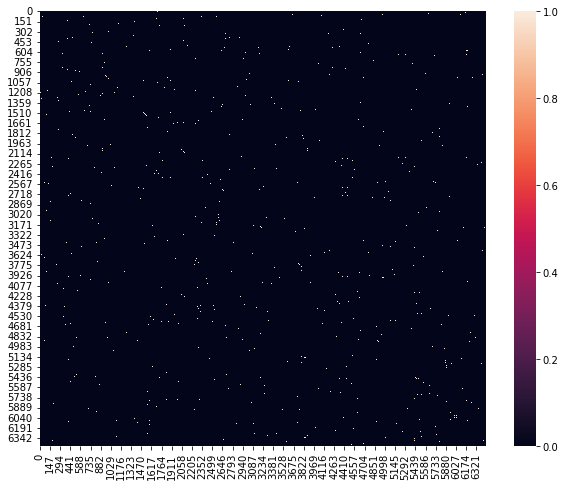

In [48]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 2*X.shape[1] - 1)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Plot
plt.figure(figsize = (10, 8))

# Grafico de distancias con k-vecinos más cercanos
sns.heatmap(neigh.kneighbors_graph(X).toarray())

plt.show()

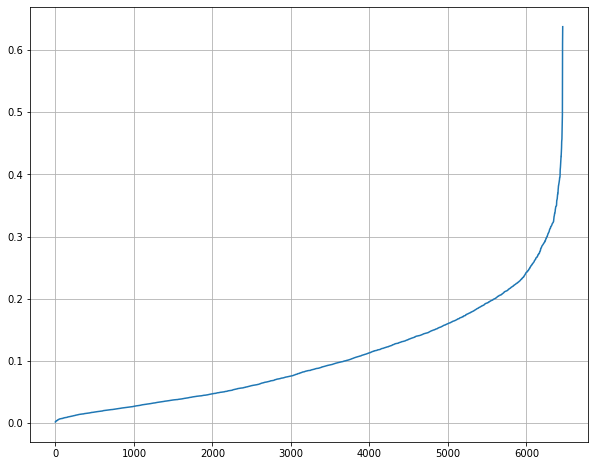

In [49]:
# Plot para encontrar el valor de eps más "optimo"

plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.grid()
plt.show();

### Modelo

In [74]:
dbscan = DBSCAN(eps = 0.25, min_samples = 14)
dbscan.fit(X)

DBSCAN(eps=0.25, min_samples=14)

### Etiquetas

In [75]:
dbscan.labels_

array([ 0,  0, -1, ...,  0,  0,  0], dtype=int64)

In [76]:
Counter(dbscan.labels_)

Counter({0: 5225, -1: 1207, 2: 15, 1: 16})

In [77]:
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

silhouette scorre: 0.14082828338565817


#### Código para buscar el valor óptimo de eps, min_samples y métrica de medición

Se adjunta el resultado en csv, ya que el tiempo de ejecución era demasiado elevado

```python

%%time

dbscan_params = list()

for eps in [0.01*i for i in range(1, 101)]:
    for min_samples in (1, 2*X.shape[1] + 1):
        for metric in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
            
            # DBSCAN
            dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            dbscan.fit(X)
            
            # Clusters
            n_clusters = len(set(dbscan.labels_))
            
            # Score
            try:
                sil_score = silhouette_score(X = X, labels = dbscan.labels_)
            except:
                silscore = np.nan
            
            dbscan_params.append([eps, min_samples, metric, sil_score, n_clusters, dbscan.labels_])
            
df_score = pd.DataFrame(data = np.array(dbscan_params), columns = ["eps", "min_samples", "metric", "score", "n_clusters", "labels"])

df_score = df_score.sort_values(by = ["score", "n_clusters"], ascending = False)

df_score.to_csv('dbscan_results.csv', sep =',', index=False)

```

In [ ]:
%%time

dbscan_params = list()

for eps in [0.01*i for i in range(1, 101)]:
    for min_samples in (1, 2*X.shape[1] + 1):
        for metric in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
            
            # DBSCAN
            dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            dbscan.fit(X)
            
            # Clusters
            n_clusters = len(set(dbscan.labels_))
            
            # Score
            try:
                sil_score = silhouette_score(X = X, labels = dbscan.labels_)
            except:
                silscore = np.nan
            
            dbscan_params.append([eps, min_samples, metric, sil_score, n_clusters, list(set(dbscan.labels_))])
            
df_score = pd.DataFrame(data = np.array(dbscan_params), columns = ["eps", "min_samples", "metric", "score", "n_clusters", "labels"])

df_score = df_score.sort_values(by = ["score", "n_clusters"], ascending = False)

df_score.to_csv('dbscan_results.csv', sep =',', index=False)

In [ ]:
# Wall time: 17min 27s

In [ ]:
df_score = df_score.sort_values(by = ["score", "n_clusters"], ascending = False)

df_score.to_csv('dbscan_results.csv', sep =',', index=False)

In [78]:
df_score = pd.read_csv('dbscan_results.csv')

In [79]:
df_score

,eps,min_samples,metric,score,n_clusters,labels
0,0.52,19,euclidean,0.355751,2,"[0, -1]"
1,0.52,19,l2,0.355751,2,"[0, -1]"
2,0.64,19,euclidean,0.351404,2,"[0, -1]"
3,0.64,19,l2,0.351404,2,"[0, -1]"
4,0.65,19,euclidean,0.351404,2,"[0, -1]"
...,...,...,...,...,...,...
1195,0.36,1,l1,-0.469816,1439,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1196,0.36,1,manhattan,-0.469816,1439,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1197,0.36,1,cosine,-0.469816,1,[0]
1198,0.02,1,cosine,-0.529624,125,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [80]:
df_score.labels[0]

'[0, -1]'

In [81]:
df_score['n_labels'] = df_score.labels.apply(lambda x : len(x.split(', ')))
df_score

,eps,min_samples,metric,score,n_clusters,labels,n_labels
0,0.52,19,euclidean,0.355751,2,"[0, -1]",2
1,0.52,19,l2,0.355751,2,"[0, -1]",2
2,0.64,19,euclidean,0.351404,2,"[0, -1]",2
3,0.64,19,l2,0.351404,2,"[0, -1]",2
4,0.65,19,euclidean,0.351404,2,"[0, -1]",2
...,...,...,...,...,...,...,...
1195,0.36,1,l1,-0.469816,1439,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1439
1196,0.36,1,manhattan,-0.469816,1439,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1439
1197,0.36,1,cosine,-0.469816,1,[0],1
1198,0.02,1,cosine,-0.529624,125,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",125


In [82]:
df_score[(df_score['n_labels']>2) & (df_score['n_labels']<=5)]

,eps,min_samples,metric,score,n_clusters,labels,n_labels
252,0.61,1,euclidean,0.257421,3,"[0, 1, 2]",3
253,0.61,1,l2,0.257421,3,"[0, 1, 2]",3
254,0.62,1,euclidean,0.257421,3,"[0, 1, 2]",3
255,0.62,1,l2,0.257421,3,"[0, 1, 2]",3
362,0.31,19,euclidean,0.219844,3,"[0, 1, -1]",3
...,...,...,...,...,...,...,...
892,0.11,19,l1,-0.302831,5,"[0, 1, 2, 3, -1]",5
893,0.11,19,manhattan,-0.302831,5,"[0, 1, 2, 3, -1]",5
939,0.09,19,cityblock,-0.329272,5,"[0, 1, 2, 3, -1]",5
940,0.09,19,l1,-0.329272,5,"[0, 1, 2, 3, -1]",5


In [83]:
dbscan = DBSCAN(eps = 0.61, min_samples = 1)
dbscan.fit(X)
print(f'Clientes por cluster {Counter(dbscan.labels_)}')
sil_score = silhouette_score(X, dbscan.labels_)
print(f"silhouette scorre: {sil_score}")

Clientes por cluster Counter({0: 6461, 1: 1, 2: 1})
silhouette scorre: 0.25742139416672305


In [ ]:
################################################################################################################################